In [ ]:
%load_ext autoreload
%autoreload 2
# Libraries
import matplotlib.pyplot as plt
import ramanpy as rpy
import time

# Read signal
spectra2 = rpy.Spectra()
to_predict = rpy.readFile("measurements/Ramandata_tablets.MAT", spectra2, True)
spectra2_copy = spectra2.copy()

Method: whittaker
--- 0.1612529754638672 seconds ---
MSE = 0.009545287392779458

Method: savgol
--- 0.0 seconds ---
MSE = 0.24567438978833261

Method: flat
--- 0.0 seconds ---
MSE = 0.10329890142273246

Method: hanning
--- 0.0025136470794677734 seconds ---
MSE = 0.1909039209635352

Method: hamming
--- 0.001997709274291992 seconds ---
MSE = 0.16247382075162362

Method: bartlett
--- 0.0019989013671875 seconds ---
MSE = 0.19090392096353517

Method: blackman
--- 0.0009992122650146484 seconds ---
MSE = 0.22147813269219804



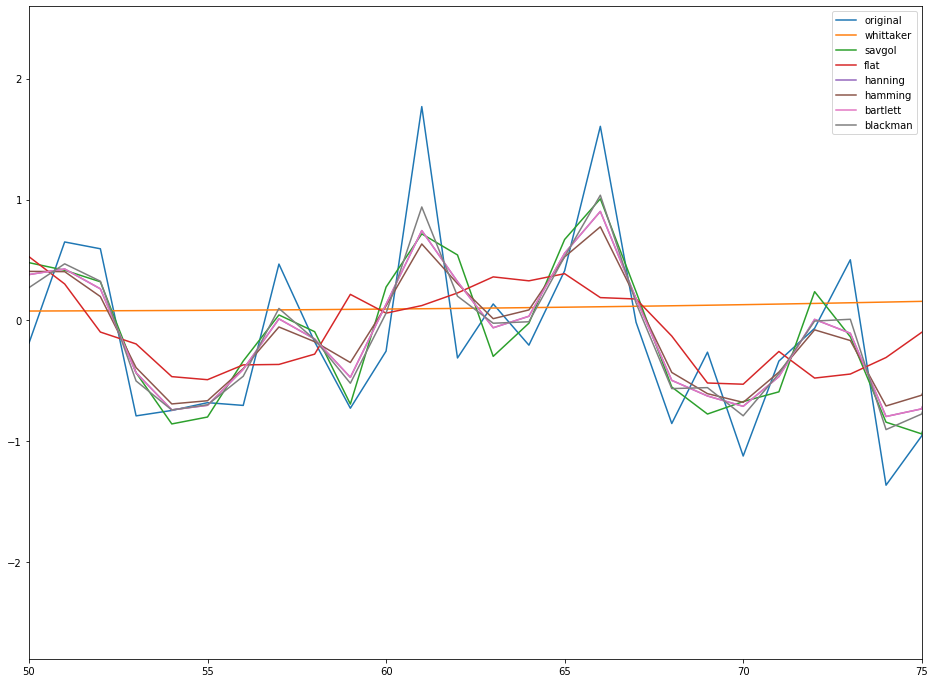

In [43]:
methods = ['whittaker','savgol',
                      'flat', 'hanning', 'hamming', 'bartlett', 'blackman']

import rampy as rp
import scipy as sp
import numpy as np
from sklearn.metrics import mean_squared_error
x = np.array(range(0,2500))
w = np.array(sp.sqrt(0.5)*sp.randn(len(x)))

# Try all methods to see performance in time and result
plt.figure(figsize=(16,12))
axes = plt.gca()
axes.set_xlim([50,75])
plt.plot(x, w, label="original")
for method in methods:
    spectra2 = spectra2_copy.copy()
    print(f"Method: {method}")
    start_time = time.time()
    new_sig = rp.smooth(x, w, method)
    plt.plot(x, new_sig, label=method)
    print("--- %s seconds ---" % (time.time() - start_time))
    print(f"MSE = {mean_squared_error(np.zeros(len(w)), new_sig)}\n")
    
plt.legend()